In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('00- Dataset CSV_Churn_Modelling (1).csv'  )

In [9]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         9

In [10]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [12]:
columns_to_remove = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=columns_to_remove)
print("Remaining columns:")
print(df.columns)


Remaining columns:
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [13]:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_cols = ['Geography', 'Gender']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [14]:
from scipy import stats

In [16]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print("\nData after encoding and scaling:")
print(df_encoded.head())

X = df_encoded.drop(columns=['Exited'])
y = df_encoded['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape}, Test set size: {X_test.shape}")


Data after encoding and scaling:
   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221  0.293517 -1.041760 -1.225848      -0.911583   0.646092   
1    -0.440036  0.198164 -1.387538  0.117350      -0.911583  -1.547768   
2    -1.536794  0.293517  1.032908  1.333053       2.527057   0.646092   
3     0.501521  0.007457 -1.387538 -1.225848       0.807737  -1.547768   
4     2.063884  0.388871 -1.041760  0.785728      -0.911583   0.646092   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0        0.970243         0.021886       1              False   
1        0.970243         0.216534       0              False   
2       -1.030670         0.240687       1              False   
3       -1.030670        -0.108918       0              False   
4        0.970243        -0.365276       0              False   

   Geography_Spain  Gender_Male  
0            False        False  
1             True        False  
2            False        Fa

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = keras.Sequential()

In [20]:
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
from tensorflow.keras.metrics import AUC, Precision, Recall
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy', AUC() , Precision(), Recall()]
)

In [25]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9040 - auc: 0.9299 - loss: 0.2427 - precision: 0.8423 - recall: 0.6438 - val_accuracy: 0.8419 - val_auc: 0.8341 - val_loss: 0.3940 - val_precision: 0.6481 - val_recall: 0.4689
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8995 - auc: 0.9377 - loss: 0.2409 - precision: 0.8386 - recall: 0.6440 - val_accuracy: 0.8500 - val_auc: 0.8354 - val_loss: 0.3948 - val_precision: 0.7030 - val_recall: 0.4410
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8992 - auc: 0.9392 - loss: 0.2412 - precision: 0.8403 - recall: 0.6402 - val_accuracy: 0.8388 - val_auc: 0.8407 - val_loss: 0.3951 - val_precision: 0.6280 - val_recall: 0.4876
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8980 - auc: 0.9305 - loss: 0.2473 - precision: 0.8275 - recall: 0.6324 - val_accuracy: 0.8500 - val_auc: 0.8366 - val_loss: 0.4009 - val_precision: 0.6667 - val_recall: 0.5093
Epoch 5/20
200/200 ━━━━━━━━━━━━━

In [28]:
try:
    test_loss, test_accuracy, test_auc, test_precision, test_recall = model.evaluate(X_test, y_test)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, "
          f"Test AUC: {test_auc:.4f}, Test Precision: {test_precision:.4f}, "
          f"Test Recall: {test_recall:.4f}")
except Exception as e:
    print(f"Error during evaluation: {e}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8382 - auc: 0.8278 - loss: 0.4218 - precision: 0.6107 - recall: 0.4913
Test Loss: 0.4351, Test Accuracy: 0.8390, Test AUC: 0.8166, Test Precision: 0.6149, Test Recall: 0.4835


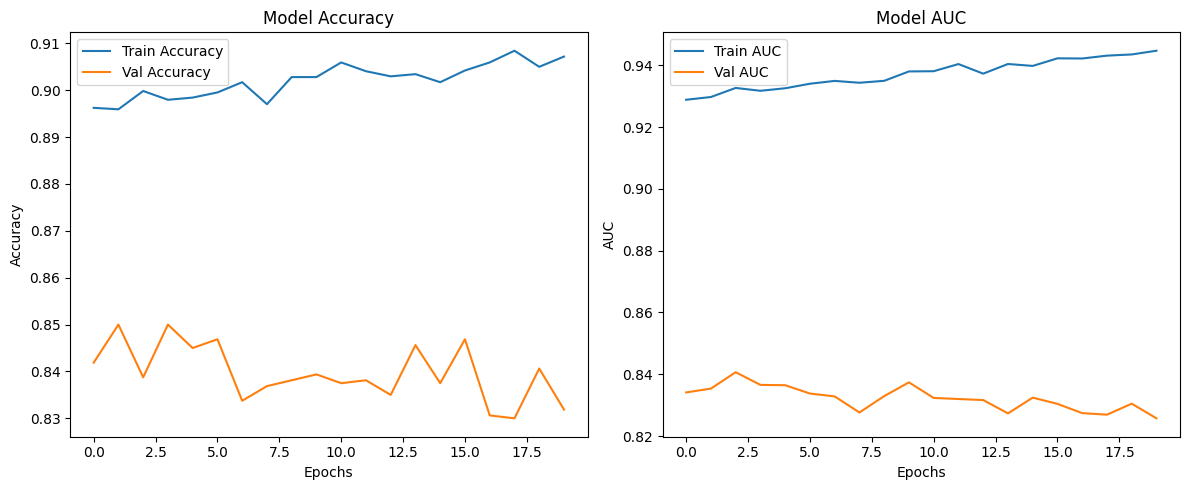

In [29]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Val AUC')
plt.title('Model AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()